In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt

In [4]:
TEU_Area = pd.read_csv('../data/ShipAreatoTEU.csv', header=0)
TEU_Area.head()

,TEU,Length (m),Width (m),Ship Area(m2),TEU_2,CO2
0,13000,366,50.0,18300.0,18000.0,3.1
1,10000,335,48.0,16080.0,8000.0,12.5
2,8500,335,42.0,14070.0,5500.0,16.6
3,6478,318,40.0,12720.0,2500.0,20.0
4,6589,305,40.0,12200.0,1500.0,32.1


In [5]:
X = np.array(TEU_Area['Ship Area(m2)'].to_list()).reshape(-1,1)
y = np.array(TEU_Area['TEU'].to_list()).reshape(-1,1)

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'TEU vs. Ship Area')

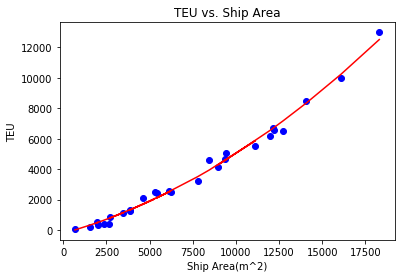

In [6]:
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.xlabel('Ship Area(m^2)')
plt.ylabel('TEU')
plt.title('TEU vs. Ship Area')

Text(0.5, 1.0, 'CO2 Efficiency vs. TEU')

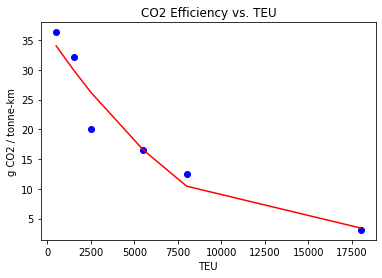

In [7]:
X1 = np.array(TEU_Area['TEU_2'].iloc[:6].to_list()).reshape(-1,1)
y1 = np.array(TEU_Area['CO2'].iloc[:6].to_list()).reshape(-1,1)

poly1 = PolynomialFeatures(degree = 2) 
X_poly1 = poly1.fit_transform(X1) 
  
poly1.fit(X_poly1, y1) 
lin3 = LinearRegression() 
lin3.fit(X_poly1, y1) 
plt.scatter(X1, y1, color = 'blue') 
plt.plot(X1, lin3.predict(poly1.fit_transform(X1)), color = 'red') 
plt.xlabel('TEU')
plt.ylabel('g CO2 / tonne-km')
plt.title('CO2 Efficiency vs. TEU')
#plt.plot(X1, lin3.predict(X1), color = 'red')

In [8]:
print('Area-TEU Coefs: ', lin2.coef_)
print('Area-TEU Intercept: ', lin2.intercept_)
print('TEU-CO2 Coefs: ', lin3.coef_)
print('TEU-CO2 Intercept: ', lin3.intercept_)

Area-TEU Coefs:  [[0.00000000e+00 3.17688908e-01 2.06756025e-05]]
Area-TEU Intercept:  [-219.2003311]
TEU-CO2 Coefs:  [[ 0.00000000e+00 -4.32978571e-03  1.39479467e-07]]
TEU-CO2 Intercept:  [36.15242554]
